In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [3]:
path = './favorita-grocery-sales-forecasting'

perfix = '' 
file_name =  '' 

os.chdir(path)

In [4]:
# list files in Kaggle data folder

with os.scandir() as bag:
    for obj in bag:
        if obj.is_file():
            print(obj.name)

combined_datasets.csv
combined_dataset_frac.csv
formatted_dataset.csv
formatted_dataset_frac.csv
formatted_dataset_frac2.csv
holidays_events.csv
items.csv
oil.csv
sample_submission.csv
stores.csv
test.csv
train.csv
transactions.csv


## Load datasets

In [5]:

df_train_csv = pd.read_csv('train.csv', sep=',', header='infer', index_col= 0 )
df_train_csv

/tmp/ipykernel_5813/3173945440.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_csv = pd.read_csv('train.csv', sep=',', header='infer', index_col= 0 )


,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
0,2013-01-01,25,103665,7.0,NaN
1,2013-01-01,25,105574,1.0,NaN
2,2013-01-01,25,105575,2.0,NaN
3,2013-01-01,25,108079,1.0,NaN
4,2013-01-01,25,108701,1.0,NaN
...,...,...,...,...,...
125497035,2017-08-15,54,2089339,4.0,False
125497036,2017-08-15,54,2106464,1.0,True
125497037,2017-08-15,54,2110456,192.0,False


In [6]:
# View value types of each columns
df_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125497040 entries, 0 to 125497039
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   item_nbr     int64  
 3   unit_sales   float64
 4   onpromotion  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 5.6+ GB


In [7]:
#checking for null values
df_train_csv.isnull().sum()

date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21657651
dtype: int64

In [8]:
# There are some transactions in stores that are not listed in train dataset.
# Fore example, in 2014-04-01 and at store_nbr = 1 there are 1216 items in train datasets but in transaction dataset it is 1847
df_train_csv[((df_train_csv['date']=='2014-04-01') & (df_train_csv['store_nbr']==1)) ]

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
21657651,2014-04-01,1,103520,1.0,False
21657652,2014-04-01,1,103665,3.0,False
21657653,2014-04-01,1,105574,1.0,False
21657654,2014-04-01,1,105575,11.0,False
21657655,2014-04-01,1,105577,4.0,False
...,...,...,...,...,...
21658862,2014-04-01,1,1259007,3.0,False
21658863,2014-04-01,1,1260242,1.0,False
21658864,2014-04-01,1,1261376,1.0,False


In [9]:
# delete rows with null value in 'onpromotion' column, there is no NaN in 'onpromotion' column of test dataset

df_train_csv.dropna(subset=['onpromotion'], inplace=True)

df_train_csv["onpromotion"] = df_train_csv["onpromotion"].astype(int)

In [10]:
df_train_csv

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
21657651,2014-04-01,1,103520,1.0,0
21657652,2014-04-01,1,103665,3.0,0
21657653,2014-04-01,1,105574,1.0,0
21657654,2014-04-01,1,105575,11.0,0
21657655,2014-04-01,1,105577,4.0,0
...,...,...,...,...,...
125497035,2017-08-15,54,2089339,4.0,0
125497036,2017-08-15,54,2106464,1.0,1
125497037,2017-08-15,54,2110456,192.0,0


In [11]:
# It is good to add 'unit' column to this df for diffrentiate real and integer values in unit sales 

df_items_csv = pd.read_csv('items.csv', sep=',', header='infer')
df_items_csv

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


In [12]:
#checking for null values
df_items_csv.isnull().sum()

item_nbr      0
family        0
class         0
perishable    0
dtype: int64

In [13]:
df_items_csv['item_nbr'].unique().shape

(4100,)

In [14]:
df_items_csv['class'].unique().shape

(337,)

In [15]:
np.unique((df_items_csv['class'].map(str) + df_items_csv['family']).values).shape

(337,)

In [16]:
# Store dataset

df_stores_csv = pd.read_csv('stores.csv', sep=',', header='infer')
df_stores_csv

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [17]:
df_stores_csv['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [18]:
df_stores_csv['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [19]:
np.unique((df_stores_csv['state']+df_stores_csv['city']).values)

array(['AzuayCuenca', 'BolivarGuaranda', 'ChimborazoRiobamba',
       'CotopaxiLatacunga', 'El OroMachala', 'EsmeraldasEsmeraldas',
       'GuayasDaule', 'GuayasGuayaquil', 'GuayasLibertad', 'GuayasPlayas',
       'ImbaburaIbarra', 'LojaLoja', 'Los RiosBabahoyo',
       'Los RiosQuevedo', 'ManabiEl Carmen', 'ManabiManta', 'PastazaPuyo',
       'PichinchaCayambe', 'PichinchaQuito', 'Santa ElenaSalinas',
       'Santo Domingo de los TsachilasSanto Domingo', 'TungurahuaAmbato'],
      dtype=object)

In [20]:
df_stores_csv['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

In [21]:
df_stores_csv['cluster'].unique()

array([13,  8,  9,  4,  6, 15,  7,  3, 12, 16,  1, 10,  2,  5, 11, 14, 17])

In [22]:
# Transaction dataset - this dataset is un-usale since there is no data availabe for test dates.

df_transactions_csv = pd.read_csv('transactions.csv', sep=',', header='infer') 
df_transactions_csv

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [23]:
# Oil price dataset

df_oil_csv = pd.read_csv('oil.csv', sep=',', header='infer') 
df_oil_csv

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [24]:
#checking for null values
df_oil_csv.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [25]:
# Fill NaN values with price in a day before. The first NaN is in not usable date.
df_oil_csv.fillna(method='ffill', inplace=True)
df_oil_csv

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [26]:
# holidays_events price dataset

df_he_csv = pd.read_csv('holidays_events.csv', sep=',', header='infer') #, index_col= 0
df_he_csv

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [27]:
#checking for null values
df_he_csv = df_he_csv[df_he_csv['transferred'] == False] # Remove records that were transferred (=True)
df_he_csv = df_he_csv[['date', 'locale']] # type has been removed, since there are dublicated dates with different types
df_he_csv

,date,locale
0,2012-03-02,Local
1,2012-04-01,Regional
2,2012-04-12,Local
3,2012-04-14,Local
4,2012-04-21,Local
...,...,...
345,2017-12-22,National
346,2017-12-23,National
347,2017-12-24,National
348,2017-12-25,National


In [28]:
df_he_csv['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [29]:
# Remove duplicated holidays (dates) with priority of National --> Regional --> Local
df_he_national = df_he_csv[df_he_csv['locale']== 'National']
df_he_regional = df_he_csv[df_he_csv['locale']== 'Regional']
df_he_local = df_he_csv[df_he_csv['locale']== 'Local']

df_he = pd.concat([df_he_national, df_he_regional, df_he_local]).drop_duplicates(subset=['date'], keep='first')

df_he

,date,locale
14,2012-08-10,National
20,2012-10-12,National
21,2012-11-02,National
22,2012-11-03,National
31,2012-12-21,National
...,...,...
336,2017-11-10,Local
337,2017-11-11,Local
338,2017-11-12,Local
339,2017-12-05,Local


# Remove Noises

In [30]:
# Removig earthquake dates (3 weeks) from dataset
lst_earthquak_date = pd.date_range('2016-04-17', '2016-05-08', freq='d').strftime('%Y-%m-%d').tolist()

df_train_csv = df_train_csv.drop(df_train_csv[df_train_csv['date'].isin(lst_earthquak_date)].index) #, inplace=True
df_train_csv



,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
21657651,2014-04-01,1,103520,1.0,0
21657652,2014-04-01,1,103665,3.0,0
21657653,2014-04-01,1,105574,1.0,0
21657654,2014-04-01,1,105575,11.0,0
21657655,2014-04-01,1,105577,4.0,0
...,...,...,...,...,...
125497035,2017-08-15,54,2089339,4.0,0
125497036,2017-08-15,54,2106464,1.0,1
125497037,2017-08-15,54,2110456,192.0,0


# Joining datasets

In [31]:
df_train_items = pd.merge(left=df_train_csv, right=df_items_csv, on = 'item_nbr', how='left')
df_train_items

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,2014-04-01,1,103520,1.0,0,GROCERY I,1028,0
1,2014-04-01,1,103665,3.0,0,BREAD/BAKERY,2712,1
2,2014-04-01,1,105574,1.0,0,GROCERY I,1045,0
3,2014-04-01,1,105575,11.0,0,GROCERY I,1045,0
4,2014-04-01,1,105577,4.0,0,GROCERY I,1045,0
...,...,...,...,...,...,...,...,...
101712838,2017-08-15,54,2089339,4.0,0,GROCERY I,1006,0
101712839,2017-08-15,54,2106464,1.0,1,BEVERAGES,1148,0
101712840,2017-08-15,54,2110456,192.0,0,BEVERAGES,1120,0
101712841,2017-08-15,54,2113914,198.0,1,CLEANING,3040,0


In [32]:
df_trian_items_stores = pd.merge(left=df_train_items, right=df_stores_csv, on = 'store_nbr', how='left')
df_trian_items_stores

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster
0,2014-04-01,1,103520,1.0,0,GROCERY I,1028,0,Quito,Pichincha,D,13
1,2014-04-01,1,103665,3.0,0,BREAD/BAKERY,2712,1,Quito,Pichincha,D,13
2,2014-04-01,1,105574,1.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13
3,2014-04-01,1,105575,11.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13
4,2014-04-01,1,105577,4.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...
101712838,2017-08-15,54,2089339,4.0,0,GROCERY I,1006,0,El Carmen,Manabi,C,3
101712839,2017-08-15,54,2106464,1.0,1,BEVERAGES,1148,0,El Carmen,Manabi,C,3
101712840,2017-08-15,54,2110456,192.0,0,BEVERAGES,1120,0,El Carmen,Manabi,C,3
101712841,2017-08-15,54,2113914,198.0,1,CLEANING,3040,0,El Carmen,Manabi,C,3


In [33]:
df_trian_items_stores_oil = pd.merge(left=df_trian_items_stores, right=df_oil_csv, on = 'date', how='left')
df_trian_items_stores_oil

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster,dcoilwtico
0,2014-04-01,1,103520,1.0,0,GROCERY I,1028,0,Quito,Pichincha,D,13,99.69
1,2014-04-01,1,103665,3.0,0,BREAD/BAKERY,2712,1,Quito,Pichincha,D,13,99.69
2,2014-04-01,1,105574,1.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13,99.69
3,2014-04-01,1,105575,11.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13,99.69
4,2014-04-01,1,105577,4.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13,99.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101712838,2017-08-15,54,2089339,4.0,0,GROCERY I,1006,0,El Carmen,Manabi,C,3,47.57
101712839,2017-08-15,54,2106464,1.0,1,BEVERAGES,1148,0,El Carmen,Manabi,C,3,47.57
101712840,2017-08-15,54,2110456,192.0,0,BEVERAGES,1120,0,El Carmen,Manabi,C,3,47.57
101712841,2017-08-15,54,2113914,198.0,1,CLEANING,3040,0,El Carmen,Manabi,C,3,47.57


In [34]:
df_trian_items_stores_oil_he = pd.merge(left=df_trian_items_stores_oil, right=df_he, on = 'date', how='left')
df_trian_items_stores_oil_he

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster,dcoilwtico,locale
0,2014-04-01,1,103520,1.0,0,GROCERY I,1028,0,Quito,Pichincha,D,13,99.69,Regional
1,2014-04-01,1,103665,3.0,0,BREAD/BAKERY,2712,1,Quito,Pichincha,D,13,99.69,Regional
2,2014-04-01,1,105574,1.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13,99.69,Regional
3,2014-04-01,1,105575,11.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13,99.69,Regional
4,2014-04-01,1,105577,4.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13,99.69,Regional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101712838,2017-08-15,54,2089339,4.0,0,GROCERY I,1006,0,El Carmen,Manabi,C,3,47.57,Local
101712839,2017-08-15,54,2106464,1.0,1,BEVERAGES,1148,0,El Carmen,Manabi,C,3,47.57,Local
101712840,2017-08-15,54,2110456,192.0,0,BEVERAGES,1120,0,El Carmen,Manabi,C,3,47.57,Local
101712841,2017-08-15,54,2113914,198.0,1,CLEANING,3040,0,El Carmen,Manabi,C,3,47.57,Local


In [35]:
df_trian_items_stores_oil_he.sample(100)

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster,dcoilwtico,locale
48775879,2016-02-13,11,363889,4.0,0,GROCERY I,1058,0,Cayambe,Pichincha,B,6,NaN,NaN
94201081,2017-06-05,33,1463862,9.0,0,BEVERAGES,1148,0,Quevedo,Los Rios,C,3,47.40,NaN
19226218,2015-02-09,46,1159413,18.0,0,GROCERY I,1040,0,Quito,Pichincha,A,14,52.99,NaN
79436973,2017-01-16,27,1089044,6.0,0,CLEANING,3020,0,Daule,Guayas,D,1,52.36,NaN
50233108,2016-02-28,39,1464045,21.0,0,BEVERAGES,1114,0,Cuenca,Azuay,B,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242892,2014-04-05,43,557256,4.0,0,EGGS,2502,1,Esmeraldas,Esmeraldas,E,10,NaN,NaN
82706906,2017-02-16,47,1457181,17.0,0,HOME CARE,3106,0,Quito,Pichincha,A,14,53.41,NaN
30465974,2015-07-23,46,740713,4.0,0,CLEANING,3032,0,Quito,Pichincha,A,14,48.11,Local
11674517,2014-10-18,48,312113,2.0,0,BREAD/BAKERY,2720,1,Quito,Pichincha,A,14,NaN,NaN


In [36]:
df_trian_items_stores_oil_he['locale'].fillna('Working', inplace=True)
df_trian_items_stores_oil_he['dcoilwtico'].fillna(method='ffill', inplace=True)
df_trian_items_stores_oil_he['holiday'] = df_trian_items_stores_oil_he['locale'].apply(lambda x: 0 if x=='Working' else 1)

# Feature Engineering

### Date and time handeling

In [37]:
# Convert date to 3 columns of year, month, day and weekday

date_col = pd.to_datetime(df_trian_items_stores_oil_he['date']) 

df_trian_items_stores_oil_he['year'] = date_col.dt.year
df_trian_items_stores_oil_he['month'] = date_col.dt.month
df_trian_items_stores_oil_he['day'] = date_col.dt.day
df_trian_items_stores_oil_he['weekday'] = date_col.dt.dayofweek
df_trian_items_stores_oil_he.drop(columns='date', inplace=True)

df_trian_items_stores_oil_he

,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster,dcoilwtico,locale,holiday,year,month,day,weekday
0,1,103520,1.0,0,GROCERY I,1028,0,Quito,Pichincha,D,13,99.69,Regional,1,2014,4,1,1
1,1,103665,3.0,0,BREAD/BAKERY,2712,1,Quito,Pichincha,D,13,99.69,Regional,1,2014,4,1,1
2,1,105574,1.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13,99.69,Regional,1,2014,4,1,1
3,1,105575,11.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13,99.69,Regional,1,2014,4,1,1
4,1,105577,4.0,0,GROCERY I,1045,0,Quito,Pichincha,D,13,99.69,Regional,1,2014,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101712838,54,2089339,4.0,0,GROCERY I,1006,0,El Carmen,Manabi,C,3,47.57,Local,1,2017,8,15,1
101712839,54,2106464,1.0,1,BEVERAGES,1148,0,El Carmen,Manabi,C,3,47.57,Local,1,2017,8,15,1
101712840,54,2110456,192.0,0,BEVERAGES,1120,0,El Carmen,Manabi,C,3,47.57,Local,1,2017,8,15,1
101712841,54,2113914,198.0,1,CLEANING,3040,0,El Carmen,Manabi,C,3,47.57,Local,1,2017,8,15,1


### Add int_unit of items for differentiating unit_sales with integer or real value 

In [38]:
# split dataset into two datasets by differentiating unit_sales with integer or real values 
r_unit = df_trian_items_stores_oil_he[df_trian_items_stores_oil_he['unit_sales']%1 != 0][['class', 'family']]
r_unit

,class,family
60,2416,POULTRY
88,2302,MEATS
98,2412,POULTRY
133,2806,SEAFOOD
197,2752,BREAD/BAKERY
...,...,...
101712582,2006,PRODUCE
101712585,2008,PRODUCE
101712619,2420,POULTRY
101712686,2028,PRODUCE


In [39]:
# Itmes' class with real value unit_sales belonge to below families
r_unit_family = r_unit['family'].unique()
r_unit_family

array(['POULTRY', 'MEATS', 'SEAFOOD', 'BREAD/BAKERY', 'DELI',
       'PREPARED FOODS', 'FROZEN FOODS', 'GROCERY I', 'PRODUCE'],
      dtype=object)

In [40]:
# Class of itmes with real value unit_sales
r_unit_family = r_unit['class'].unique()
r_unit_family

array([2416, 2302, 2412, 2806, 2752, 2690, 2662, 2306, 2664, 2802, 2304,
       2904, 2372, 2420, 2242, 2238, 2226, 1002, 2006, 2028, 2008, 2010,
       2032, 2034, 2012, 2014, 2004, 2016, 2020, 2022, 2030, 2002, 2018,
       1046, 2074])

In [41]:
# Add the column of 'int_unit' that its 1 indicates unit sales of specific classes are only integer value, 
# its 0 shows that unit sales can be integer (e.g 2KG) or float (e.g. 2.5KG)

df_trian_items_stores_oil_he['int_unit'] = df_trian_items_stores_oil_he['class'].apply(lambda x: 0 if x in r_unit['class'] else 1)

In [42]:
df_trian_items_stores_oil_he.sample(30)

,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster,dcoilwtico,locale,holiday,year,month,day,weekday,int_unit
6870021,38,464334,10.000,0,GROCERY I,1040,0,Loja,Loja,D,4,98.26,Working,0,2014,8,4,0,1
84253126,34,807495,2.000,0,BEVERAGES,1124,0,Guayaquil,Guayas,B,6,53.33,Working,0,2017,3,3,4,1
33504556,24,1239905,2.000,0,DAIRY,2172,1,Guayaquil,Guayas,D,1,45.29,Working,0,2015,8,29,5,1
14438256,11,265279,4.000,0,BREAD/BAKERY,2718,1,Cayambe,Pichincha,B,6,73.70,Working,0,2014,11,27,3,1
44062326,20,1121514,5.000,1,CLEANING,3020,0,Quito,Pichincha,B,6,36.76,National,1,2015,12,23,2,1
26473643,49,1464072,5.000,0,BEVERAGES,1190,0,Quito,Pichincha,A,11,59.67,Working,0,2015,6,3,2,1
16546989,45,1159726,1.000,0,GROCERY I,1076,0,Quito,Pichincha,A,11,54.59,National,1,2014,12,26,4,1
7689004,3,796396,19.000,0,CLEANING,3046,0,Quito,Pichincha,D,8,96.40,Working,0,2014,8,20,2,1
84570583,25,1942510,2.000,0,BEVERAGES,1122,0,Salinas,Santa Elena,D,1,53.19,Working,0,2017,3,6,0,1
95813177,50,1718310,3.000,0,PRODUCE,2018,1,Ambato,Tungurahua,A,14,43.34,Working,0,2017,6,20,1,1


In [42]:
df_trian_items_stores_oil_he.to_csv('combined_datasets.csv')

## Exploratory Data Analysis (EDA)

In [87]:
df1 = df_trian_items_stores_oil_he[['family', 'unit_sales']].groupby(by = ['family']).sum()
df1.sort_values(by = ['unit_sales'], ascending=False, inplace=True)


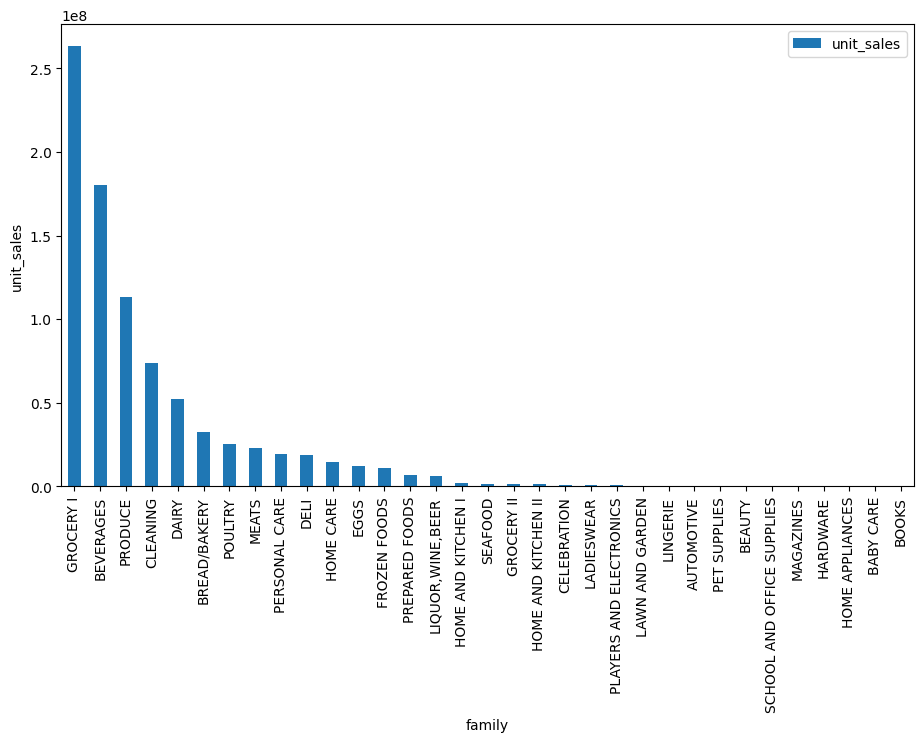

In [53]:
df1.plot(kind='bar', ylabel='unit_sales',figsize=(11,6));

In [54]:
#Calculate contrbution of a column in total unit sales

def cumulatively_cat(cat_col, cont_col, df,threshold=0.5):
    df_agg = df[[cat_col, cont_col]].groupby(by=[cat_col]).sum()
    df_agg.sort_values(by=[cont_col], ascending=False, inplace=True)
    df_agg.reset_index(inplace=True)
    tot = df_agg[cont_col].sum()
    sub_tot = 0
    cat_lst = []
    for idx, row in df_agg.iterrows():
        sub_tot = sub_tot + row.iloc[1]
        cat_lst.append((row.iloc[0], round(row.iloc[1]/tot, 2)))
                       
        if sub_tot/tot >= threshold: 
            break
    return cat_lst, sub_tot/tot
        


In [59]:
cat_list, pct = cumulatively_cat('item_nbr', 'unit_sales', df_trian_items_stores_oil_he, threshold=0.8)
print('{} items make {}% of total unit sales'.format(len(cat_list), round(pct*100,2)))

1624 items make 80.01% of total unit sales


In [60]:
cat_list, pct = cumulatively_cat('class', 'unit_sales', df_trian_items_stores_oil_he, threshold=0.8)
print('{} classes make {}% of total unit sales'.format(len(cat_list), round(pct*100,2)))

70 classes make 80.09% of total unit sales


In [61]:
cat_list, pct = cumulatively_cat('family', 'unit_sales', df_trian_items_stores_oil_he, threshold=0.8)
print('{} product families make {}% of total unit sales'.format(len(cat_list), round(pct*100,2)))

6 product families make 83.02% of total unit sales


## Correlation Study

In [62]:
df_trian_items_stores_oil_he[['item_nbr', 'unit_sales']].corr(method ='pearson')

,item_nbr,unit_sales
item_nbr,1.000000,0.020354
unit_sales,0.020354,1.000000


In [63]:
df_trian_items_stores_oil_he[['dcoilwtico', 'unit_sales']].corr(method ='pearson')

,dcoilwtico,unit_sales
dcoilwtico,1.000000,0.011605
unit_sales,0.011605,1.000000


In [65]:
df_trian_items_stores_oil_he.corr(method ='pearson')

,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,cluster,dcoilwtico,holiday,year,month,day,weekday,int_unit
store_nbr,1.000000,0.010517,0.045369,0.005822,0.006637,0.002313,0.022108,-0.005803,0.000938,0.012294,0.001367,0.001455,0.004960,0.000044
item_nbr,0.010517,1.000000,0.020354,0.051715,0.062779,0.076702,-0.002973,-0.154532,-0.005501,0.212901,0.012595,-0.001022,0.000778,0.020627
unit_sales,0.045369,0.020354,1.000000,0.061973,-0.053805,0.061790,0.024033,0.011605,0.008735,-0.017454,0.013171,-0.011823,0.032190,0.002395
onpromotion,0.005822,0.051715,0.061973,1.000000,0.021936,0.130022,-0.007298,-0.067950,0.003444,0.131499,0.012095,0.005685,-0.009994,0.003917
class,0.006637,0.062779,-0.053805,0.021936,1.000000,0.173013,0.000312,-0.000134,0.001093,-0.003664,0.006363,-0.002457,0.008298,-0.121645
perishable,0.002313,0.076702,0.061790,0.130022,0.173013,1.000000,0.000235,0.001210,-0.000896,-0.002142,0.008403,0.002440,-0.005345,-0.027429
cluster,0.022108,-0.002973,0.024033,-0.007298,0.000312,0.000235,1.000000,0.020655,0.000639,-0.016594,-0.000522,-0.000720,-0.001531,-0.001538
dcoilwtico,-0.005803,-0.154532,0.011605,-0.067950,-0.000134,0.001210,0.020655,1.000000,0.060456,-0.614081,0.120023,-0.009052,0.000723,-0.004739
holiday,0.000938,-0.005501,0.008735,0.003444,0.001093,-0.000896,0.000639,0.060456,1.000000,-0.082687,0.154849,-0.052159,-0.013526,-0.000876
year,0.012294,0.212901,-0.017454,0.131499,-0.003664,-0.002142,-0.016594,-0.614081,-0.082687,1.000000,-0.377932,-0.022061,0.001285,0.004055


### Precentage of on promotion sales

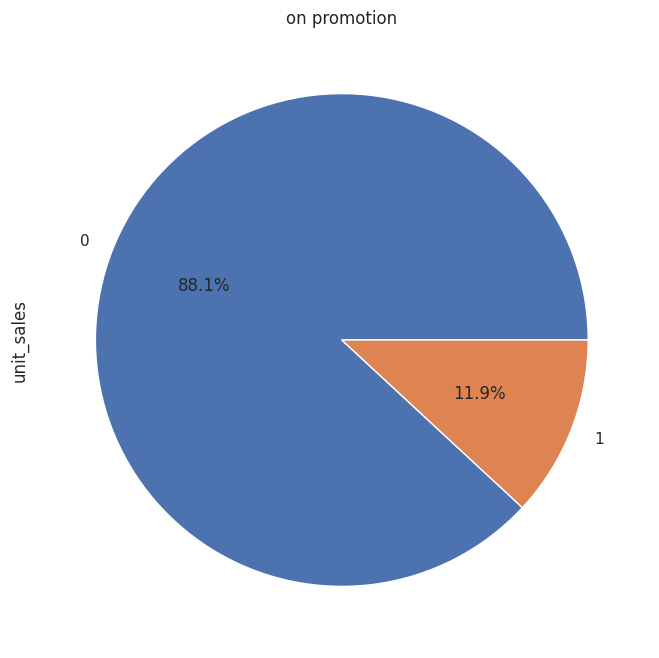

In [83]:
df_trian_items_stores_oil_he['unit_sales'].groupby(df_trian_items_stores_oil_he['onpromotion']).sum().plot(
    kind="pie", title='on promotion', ylabel='unit_sales',figsize=(10,8), autopct='%1.1f%%');

### Precentage of perishable in unit sales

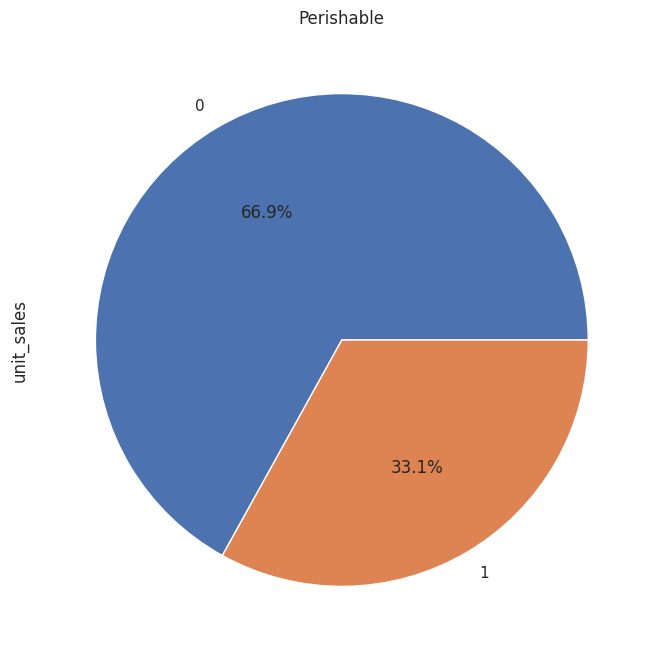

In [84]:
df_trian_items_stores_oil_he['unit_sales'].groupby(df_trian_items_stores_oil_he['perishable']).sum().plot(
    kind="pie", title='Perishable', ylabel='unit_sales',figsize=(10,8), autopct='%1.1f%%');

In [86]:
### Precentage unit sales per sates

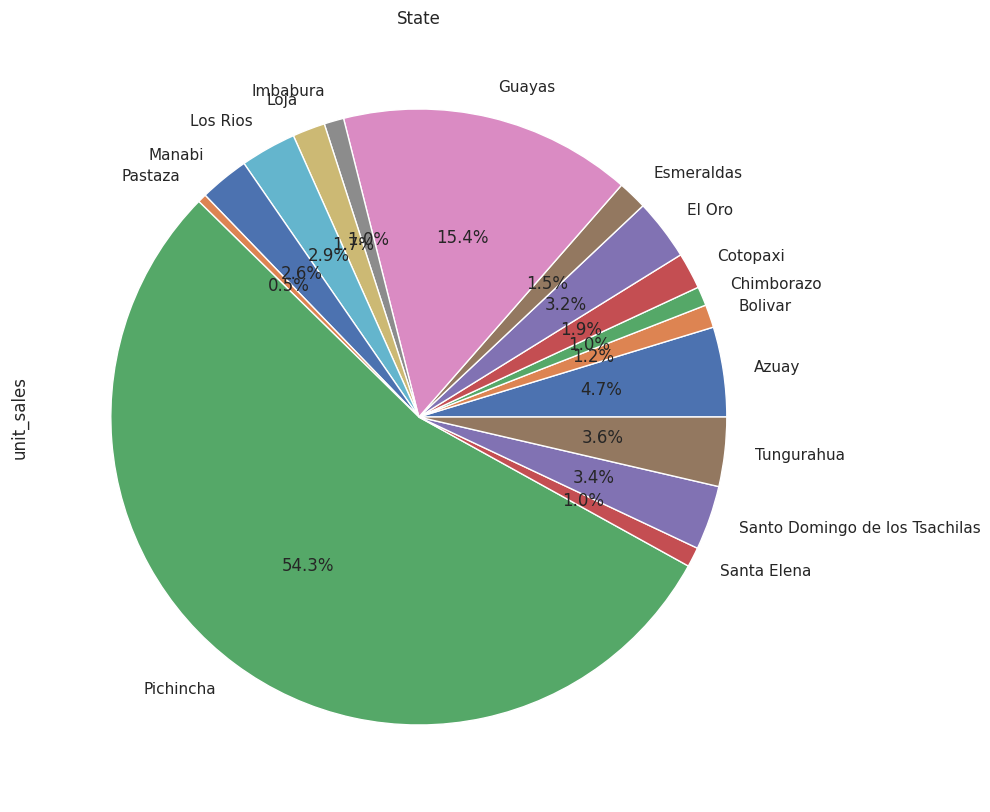

In [81]:
df_trian_items_stores_oil_he['unit_sales'].groupby(df_trian_items_stores_oil_he['state']).sum().plot(
    kind="pie", title='State', ylabel='unit_sales',figsize=(12,10), autopct='%1.1f%%');

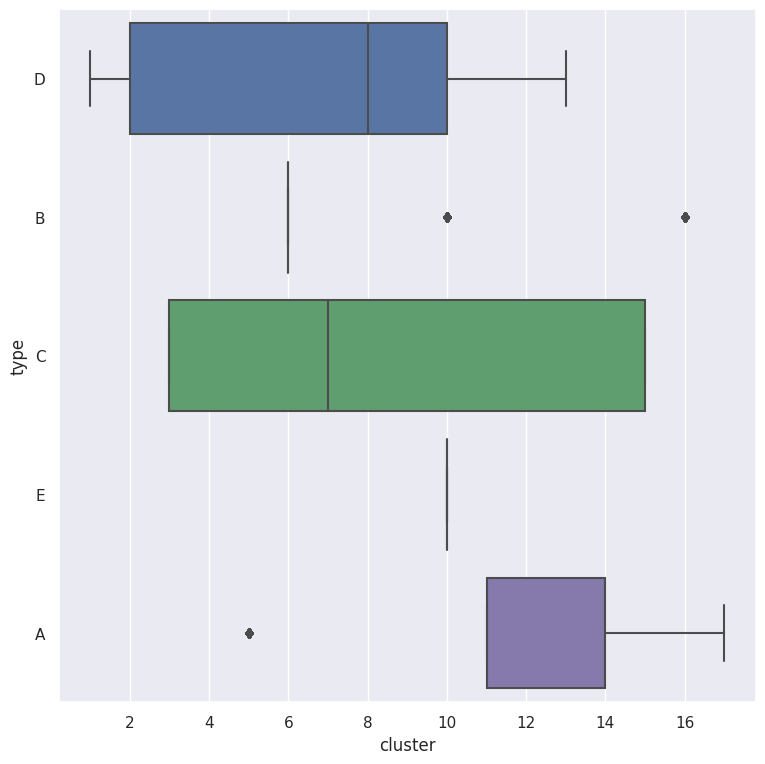

In [82]:
sns.set(rc={'figure.figsize':(9,9)})
sns.boxplot(x="cluster", y="type", data=df_trian_items_stores_oil_he);